In [7]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import *
from tabulate import tabulate

In [8]:
mp_key = "u9ZAHMoFazUCz7neZTBfXBwCZ5RESH4Z"
mp_id = "mp-567636"

In [9]:
structure = MPRester(mp_key).get_structure_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(structure).get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#calculateur avec la longueur d'onde voulue
xrd = XRDCalculator(1.54060) 

#diagramme de diffraction de la structure 
pattern = xrd.get_pattern(conv_struc) 

In [11]:
for i in range(0,3):
        print(tabulate([
            ["Angle 2\u03B8(°) : ",pattern.x[i]],
            ["Intensité (%): ",pattern.y[i]],
            ["Indices h,k,l: ",pattern.hkls[i]],
            ["Distance interplanaire : ",pattern.d_hkls[i]]],
            headers=["pic n°"+str(i+1)+" :\n",""]))
        print("\n")  

pic n°1 :

------------------------  ---------------------------------------
Angle 2θ(°) :             26.81552446885925
Intensité (%):            43.07964803533975
Indices h,k,l:            [{'hkl': (1, 1, 1), 'multiplicity': 8}]
Distance interplanaire :  3.321981330258643


pic n°2 :

------------------------  ---------------------------------------
Angle 2θ(°) :             31.06103560181495
Intensité (%):            32.82306993679914
Indices h,k,l:            [{'hkl': (2, 0, 0), 'multiplicity': 6}]
Distance interplanaire :  2.876920222901608


pic n°3 :

------------------------  ----------------------------------------
Angle 2θ(°) :             44.50115518783502
Intensité (%):            100.0
Indices h,k,l:            [{'hkl': (2, 2, 0), 'multiplicity': 12}]
Distance interplanaire :  2.034289798546441




<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

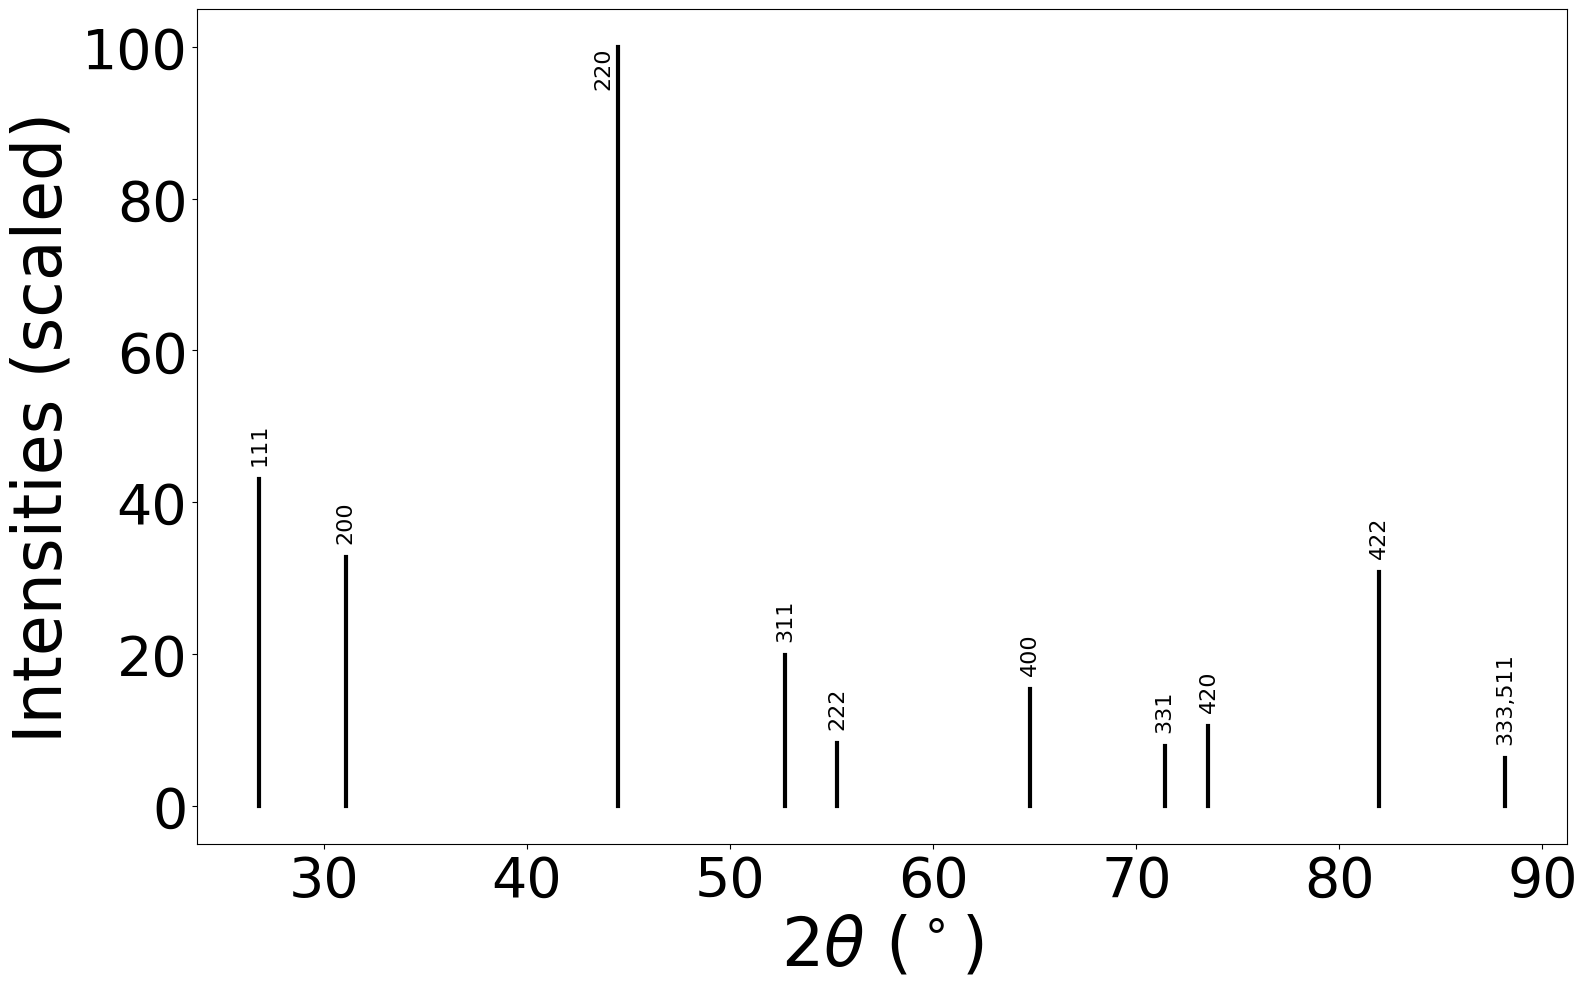

In [12]:
xrd.get_plot(conv_struc)